# Исследование тарифных планов сотовой связи

В ходе работы будет проведен предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Задача**

Проверить гипотезы: 

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Этапы проекта:**

1. Изучение общей информации о данных и  их предобработка
2. Анализ данных
3. Проверка гипотез
4. Выводы

## 1. Изучение общей информации о данных  и  их предобработка

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd # импортируем библиотеку pandas 
import numpy as np
try:
    dus = pd.read_csv(r'C:\Users\KSGul\data\users.csv') # запишем в переменную dus файл c данными о клиентах при помощи конструкции try-except
except:
    dus = pd.read_csv('/datasets/users.csv')

display(dus.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [6]:
dus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица включает в себя:  
500 строк
8 сстолбцов

* `user_id` — уникальный идентификатор пользователя
* `first_name` — имя пользователя
* `last_name` — фамилия пользователя
* `age` — возраст пользователя (годы)
* `reg_date` — дата подключения тарифа (день, месяц, год)
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* `city` — город проживания пользователя
* `tarif` — название тарифного плана

In [7]:
dus['reg_date'] = pd.to_datetime(dus['reg_date'], format='%Y-%m-%d') #Изменим значения столбца с временем
dus['churn_date'] = pd.to_datetime(dus['churn_date'], format='%Y-%m-%d') #Изменим значения столбца с временем
display(dus.head())
dus.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [8]:
display(dus.duplicated().sum()) #Найдем строки дубликаты

0

In [9]:
dus['month'] = dus['reg_date'].dt.month #месяц подписки на тариф
display(dus.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [10]:
dus_short = dus[['user_id', 'tariff']] #создание дополнительной таблицы с идентификатором пользователя и тарифом
display(dus_short.head())

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra


In [11]:
display(dus_short['user_id'].nunique())

500

In [12]:
try:
    din = pd.read_csv(r'C:\Users\KSGul\data\internet.csv', index_col=0) # запишем в переменную din файл с данными об интернет трафике при помощи конструкции try-except
except:
    din = pd.read_csv('/datasets/internet.csv', index_col=0)

display(din.head())

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [13]:
din.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Таблица включает в себя:  
14936 строк
5 сстолбцов

* `id` — уникальный номер сессии
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
* `session_date` — дата интернет-сессии
* `user_id` — идентификатор пользователя

In [14]:
din['session_date'] = pd.to_datetime(din['session_date'], format='%Y-%m-%d') #Изменим значения столбца с временем
display(din.head())
din.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


In [15]:
din['month'] = din['session_date'].dt.month #месяц интернет сесии
display(din.head())

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [16]:
din_gb = din.pivot_table(index=('user_id', 'month'), values = 'mb_used', aggfunc ='sum') #создание сфодной таблицы с суммой интернет трафика по месяцам в Мб
din_gb['mb_used'] = np.ceil(din_gb['mb_used']/1024)
display(din_gb)

mb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0
...                ...
1498    10        21.0
1499    9          2.0
        10        18.0
        11        18.0
        12        13.0

[3203 rows x 1 columns]

In [17]:
try:
    dms = pd.read_csv(r'C:\Users\KSGul\data\messages.csv') # запишем в переменную dms файл с данными о сообщених при помощи конструкции try-except
except:
    dms = pd.read_csv('/datasets/messages.csv')

display(dms)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [18]:
dms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица включает в себя:  
123036 строк
3 столбца

* `id` — уникальный номер сообщения
* `message_date` — дата сообщения
* `user_id` — идентификатор пользователя, отправившего сообщение

In [19]:
dms['message_date'] = pd.to_datetime(dms['message_date'], format='%Y-%m-%d') #Изменим значения столбца с временем
display(dms.head())
dms.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [20]:
try:
    dtf = pd.read_csv(r'C:\Users\KSGul\data\tariffs.csv') # запишем в переменную dtf файл c данными о тарифах при помощи конструкции try-except
except:
    dtf = pd.read_csv('/datasets/tariffs.csv')

display(dtf)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица включает в себя:  
2 строки
8 столбцов

* `tariff_name` — название тарифа
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта

In [21]:
try:
    dcl = pd.read_csv(r'C:\Users\KSGul\data\calls.csv') # запишем в переменную dcl файл с данными о звонках при помощи конструкции try-except
except:
    dcl = pd.read_csv('/datasets/calls.csv')

display(dcl.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [22]:
dcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица включает в себя:  
202607 строк
4 столбца

* `id` — уникальный номер звонка
* `call_date` — дата звонка
* `duration` — длительность звонка в минутах
* `user_id` — идентификатор пользователя, сделавшего звонок

In [23]:
dcl['call_date'] = pd.to_datetime(dcl['call_date'], format='%Y-%m-%d')
display(dcl.head())
dcl.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [24]:
dcl['duration'] = np.ceil(dcl['duration'])
display(dcl.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


In [25]:
dcl['month'] = dcl['call_date'].dt.month #месяц публикации объявления
display(dcl.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [26]:
dcl_min = dcl.pivot_table(index=('user_id', 'month'), values = 'duration', aggfunc=('count', 'sum')) #Создадим сводную таблицу с количеством звонков в месяц и их длительностью
display(dcl_min)
display(dcl_min.reset_index()['user_id'].nunique())

count    sum
user_id month              
1000    5         22  159.0
        6         43  172.0
        7         47  340.0
        8         52  408.0
        9         58  466.0
...              ...    ...
1498    10        41  247.0
1499    9          9   70.0
        10        68  449.0
        11        74  612.0
        12        69  492.0

[3174 rows x 2 columns]

492

In [27]:
dms['month'] = dms['message_date'].dt.month #месяц публикации объявления
display(dms.head())

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [28]:
dms_count = dms.pivot_table(index=('user_id', 'month'), values='id', aggfunc='count') #Создание сводной таблицы с количесвом сообщений в месяц
display(dms_count)
display(dms_count.reset_index()['user_id'].nunique())

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

426

In [29]:
data_message_call = dms_count.merge(dcl_min, on=('user_id', 'month'), how='outer') #Объединение таблиц с количеством сообщений и звонков
display(data_message_call)
display(data_message_call.reset_index()['user_id'].nunique())

id  count    sum
user_id month                    
1000    5      22.0   22.0  159.0
        6      60.0   43.0  172.0
        7      75.0   47.0  340.0
        8      81.0   52.0  408.0
        9      57.0   58.0  466.0
...             ...    ...    ...
1494    8       NaN   32.0  262.0
        9       NaN   66.0  501.0
        10      NaN   52.0  354.0
        11      NaN   63.0  411.0
        12      NaN   62.0  418.0

[3213 rows x 3 columns]

498

In [30]:
data_pay = data_message_call.merge(din_gb, on=('user_id', 'month'), how='outer') # Создание общей таблицы с количеством сообщений, длительностьь звонков и использованного интернет трафика по пользователям и месяцам
display(data_pay)
display(data_pay.reset_index()['user_id'].nunique())

id  count    sum  mb_used
user_id month                             
1000    5      22.0   22.0  159.0      3.0
        6      60.0   43.0  172.0     23.0
        7      75.0   47.0  340.0     14.0
        8      81.0   52.0  408.0     14.0
        9      57.0   58.0  466.0     15.0
...             ...    ...    ...      ...
1494    9       NaN   66.0  501.0     17.0
        10      NaN   52.0  354.0     18.0
        11      NaN   63.0  411.0     18.0
        12      NaN   62.0  418.0     18.0
1476    4       NaN    NaN    NaN      1.0

[3214 rows x 4 columns]

498

In [31]:
data_pay.columns = ['message_count', 'call_count', 'during_call', 'gb_used'] #изменим наименования столбцов
display(data_pay)

message_count  call_count  during_call  gb_used
user_id month                                                 
1000    5               22.0        22.0        159.0      3.0
        6               60.0        43.0        172.0     23.0
        7               75.0        47.0        340.0     14.0
        8               81.0        52.0        408.0     14.0
        9               57.0        58.0        466.0     15.0
...                      ...         ...          ...      ...
1494    9                NaN        66.0        501.0     17.0
        10               NaN        52.0        354.0     18.0
        11               NaN        63.0        411.0     18.0
        12               NaN        62.0        418.0     18.0
1476    4                NaN         NaN          NaN      1.0

[3214 rows x 4 columns]

In [32]:
data_pay.reset_index('user_id', inplace=True) #Изменение индексов
display(data_pay.head(10))

,user_id,message_count,call_count,during_call,gb_used
month,,,,,
5,1000,22.0,22.0,159.0,3.0
6,1000,60.0,43.0,172.0,23.0
7,1000,75.0,47.0,340.0,14.0
8,1000,81.0,52.0,408.0,14.0
9,1000,57.0,58.0,466.0,15.0
10,1000,73.0,57.0,350.0,15.0
11,1000,58.0,43.0,338.0,15.0
12,1000,70.0,46.0,333.0,10.0
6,1002,4.0,15.0,117.0,11.0


In [33]:
data_pay.reset_index('month', inplace=True) #Изменение индексов
display(data_pay.head(10))

,month,user_id,message_count,call_count,during_call,gb_used
0,5,1000,22.0,22.0,159.0,3.0
1,6,1000,60.0,43.0,172.0,23.0
2,7,1000,75.0,47.0,340.0,14.0
3,8,1000,81.0,52.0,408.0,14.0
4,9,1000,57.0,58.0,466.0,15.0
5,10,1000,73.0,57.0,350.0,15.0
6,11,1000,58.0,43.0,338.0,15.0
7,12,1000,70.0,46.0,333.0,10.0
8,6,1002,4.0,15.0,117.0,11.0
9,7,1002,11.0,26.0,214.0,18.0


In [34]:
data_pay_tariff = data_pay.merge(dus_short, on='user_id', how='outer') #Объединение с таблицей для добавления тарифов
display(data_pay_tariff)
display(data_pay_tariff['user_id'].nunique())

,month,user_id,message_count,call_count,during_call,gb_used,tariff
0,5.0,1000,22.0,22.0,159.0,3.0,ultra
1,6.0,1000,60.0,43.0,172.0,23.0,ultra
2,7.0,1000,75.0,47.0,340.0,14.0,ultra
3,8.0,1000,81.0,52.0,408.0,14.0,ultra
4,9.0,1000,57.0,58.0,466.0,15.0,ultra
...,...,...,...,...,...,...,...
3211,10.0,1494,NaN,52.0,354.0,18.0,smart
3212,11.0,1494,NaN,63.0,411.0,18.0,smart
3213,12.0,1494,NaN,62.0,418.0,18.0,smart
3214,NaN,1128,NaN,NaN,NaN,NaN,ultra


500

In [35]:
data_pay_tariff = data_pay_tariff.rename( 
columns={'tariff':'tariff_name'}
)
data_pay_tariff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          3214 non-null   float64
 1   user_id        3216 non-null   int64  
 2   message_count  2717 non-null   float64
 3   call_count     3174 non-null   float64
 4   during_call    3174 non-null   float64
 5   gb_used        3203 non-null   float64
 6   tariff_name    3216 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 201.0+ KB


In [36]:
display(dtf)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [37]:
dtf['mb_per_month_included'] = dtf['mb_per_month_included']/1024 # Перевод из Мб в Гб
display(dtf)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


In [38]:
data = data_pay_tariff.merge(dtf, on='tariff_name', how='left') #Объединение таблиц для получения данных о тарфином плане
display(data)

,month,user_id,message_count,call_count,during_call,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,5.0,1000,22.0,22.0,159.0,3.0,ultra,1000,30.0,3000,1950,150,1,1
1,6.0,1000,60.0,43.0,172.0,23.0,ultra,1000,30.0,3000,1950,150,1,1
2,7.0,1000,75.0,47.0,340.0,14.0,ultra,1000,30.0,3000,1950,150,1,1
3,8.0,1000,81.0,52.0,408.0,14.0,ultra,1000,30.0,3000,1950,150,1,1
4,9.0,1000,57.0,58.0,466.0,15.0,ultra,1000,30.0,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,10.0,1494,NaN,52.0,354.0,18.0,smart,50,15.0,500,550,200,3,3
3212,11.0,1494,NaN,63.0,411.0,18.0,smart,50,15.0,500,550,200,3,3
3213,12.0,1494,NaN,62.0,418.0,18.0,smart,50,15.0,500,550,200,3,3
3214,NaN,1128,NaN,NaN,NaN,NaN,ultra,1000,30.0,3000,1950,150,1,1


In [39]:
def monthly_pay(tariff): #создание столбца с обязательным ежемесячным платежом
    if tariff == 'smart':
        return 550
    return 1950
data['monthly_pay'] = data['tariff_name'].apply(monthly_pay)
display(data)
    

,month,user_id,message_count,call_count,during_call,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_pay
0,5.0,1000,22.0,22.0,159.0,3.0,ultra,1000,30.0,3000,1950,150,1,1,1950
1,6.0,1000,60.0,43.0,172.0,23.0,ultra,1000,30.0,3000,1950,150,1,1,1950
2,7.0,1000,75.0,47.0,340.0,14.0,ultra,1000,30.0,3000,1950,150,1,1,1950
3,8.0,1000,81.0,52.0,408.0,14.0,ultra,1000,30.0,3000,1950,150,1,1,1950
4,9.0,1000,57.0,58.0,466.0,15.0,ultra,1000,30.0,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,10.0,1494,NaN,52.0,354.0,18.0,smart,50,15.0,500,550,200,3,3,550
3212,11.0,1494,NaN,63.0,411.0,18.0,smart,50,15.0,500,550,200,3,3,550
3213,12.0,1494,NaN,62.0,418.0,18.0,smart,50,15.0,500,550,200,3,3,550
3214,NaN,1128,NaN,NaN,NaN,NaN,ultra,1000,30.0,3000,1950,150,1,1,1950


In [40]:
def pay(row):
    pay_min = 0
    pay_message = 0
    pay_internet = 0
    if (row['during_call'] - row['minutes_included']) > 0:
        pay_min = (row['during_call'] - row['minutes_included']) * row['rub_per_minute']
    if (row['message_count'] - row['messages_included']) > 0: 
        pay_message = (row['message_count'] - row['messages_included']) * row['rub_per_message']
    if (row['gb_used'] - row['mb_per_month_included']) > 0:
        pay_internet = (row['gb_used'] - row['mb_per_month_included']) * row['rub_per_gb']
    result =  pay_min + pay_message +  pay_internet + row['rub_monthly_fee']
    return result
data['monthly_pay'] = data.apply(pay, axis=1)
display(data)

,month,user_id,message_count,call_count,during_call,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_pay
0,5.0,1000,22.0,22.0,159.0,3.0,ultra,1000,30.0,3000,1950,150,1,1,1950.0
1,6.0,1000,60.0,43.0,172.0,23.0,ultra,1000,30.0,3000,1950,150,1,1,1950.0
2,7.0,1000,75.0,47.0,340.0,14.0,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3,8.0,1000,81.0,52.0,408.0,14.0,ultra,1000,30.0,3000,1950,150,1,1,1950.0
4,9.0,1000,57.0,58.0,466.0,15.0,ultra,1000,30.0,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,10.0,1494,NaN,52.0,354.0,18.0,smart,50,15.0,500,550,200,3,3,1150.0
3212,11.0,1494,NaN,63.0,411.0,18.0,smart,50,15.0,500,550,200,3,3,1150.0
3213,12.0,1494,NaN,62.0,418.0,18.0,smart,50,15.0,500,550,200,3,3,1150.0
3214,NaN,1128,NaN,NaN,NaN,NaN,ultra,1000,30.0,3000,1950,150,1,1,1950.0


In [41]:
data_monthly_pay = data.pivot_table(index=('user_id', 'month', 'tariff_name'), values=('message_count', 'call_count', 'during_call', 'gb_used', 'monthly_pay'))
display(data_monthly_pay)

call_count  during_call  gb_used  message_count  \
user_id month tariff_name                                                    
1000    5.0   ultra              22.0        159.0      3.0           22.0   
        6.0   ultra              43.0        172.0     23.0           60.0   
        7.0   ultra              47.0        340.0     14.0           75.0   
        8.0   ultra              52.0        408.0     14.0           81.0   
        9.0   ultra              58.0        466.0     15.0           57.0   
...                               ...          ...      ...            ...   
1498    10.0  smart              41.0        247.0     21.0           42.0   
1499    9.0   smart               9.0         70.0      2.0           11.0   
        10.0  smart              68.0        449.0     18.0           48.0   
        11.0  smart              74.0        612.0     18.0           59.0   
        12.0  smart              69.0        492.0     13.0           66.0   

                           monthly_pay  
user_id month tariff_name               
1000    5.0   ultra             1950.0  
        6.0   ultra             1950.0  
        7.0   ultra             1950.0  
        8.0   ultra             1950.0  
        9.0   ultra             1950.0  
...                                ...  
1498    10.0  smart             1750.0  
1499    9.0   smart              550.0  
        10.0  smart             1150.0  
        11.0  smart             1513.0  
        12.0  smart              598.0  

[3214 rows x 5 columns]

**Промежуточные выводы:**

1. В таблицах были приведены временные данные к необходимому типу;
2. Данные о длительности звонков и интернет трафике округлены по правилам тарифов;
3. Посчитаны реальные значения платы по использованию тарифов для каждого пользователя по месяцам.

# 2. Анализ данных

In [42]:
data_monthly_pay.reset_index('tariff_name', inplace=True) #Изменение индексов
display(data_monthly_pay.head(10))

tariff_name  call_count  during_call  gb_used  message_count  \
user_id month                                                                
1000    5.0         ultra        22.0        159.0      3.0           22.0   
        6.0         ultra        43.0        172.0     23.0           60.0   
        7.0         ultra        47.0        340.0     14.0           75.0   
        8.0         ultra        52.0        408.0     14.0           81.0   
        9.0         ultra        58.0        466.0     15.0           57.0   
        10.0        ultra        57.0        350.0     15.0           73.0   
        11.0        ultra        43.0        338.0     15.0           58.0   
        12.0        ultra        46.0        333.0     10.0           70.0   
1001    11.0        smart        59.0        430.0     18.0            NaN   
        12.0        smart        63.0        414.0     14.0            NaN   

               monthly_pay  
user_id month               
1000    5.0         1950.0  
        6.0         1950.0  
        7.0         1950.0  
        8.0         1950.0  
        9.0         1950.0  
        10.0        1950.0  
        11.0        1950.0  
        12.0        1950.0  
1001    11.0        1150.0  
        12.0         550.0

**Для дальнейшей работы с данными и оценки тарифов, создадим 2 таблицы путем среза данных по тарифам**

In [43]:
data_ultra = data_monthly_pay.query('tariff_name == "ultra"') #Срез по тариу ultra
display(data_ultra.head(10))

tariff_name  call_count  during_call  gb_used  message_count  \
user_id month                                                                
1000    5.0         ultra        22.0        159.0      3.0           22.0   
        6.0         ultra        43.0        172.0     23.0           60.0   
        7.0         ultra        47.0        340.0     14.0           75.0   
        8.0         ultra        52.0        408.0     14.0           81.0   
        9.0         ultra        58.0        466.0     15.0           57.0   
        10.0        ultra        57.0        350.0     15.0           73.0   
        11.0        ultra        43.0        338.0     15.0           58.0   
        12.0        ultra        46.0        333.0     10.0           70.0   
1003    8.0         ultra        55.0        380.0      9.0           37.0   
        9.0         ultra       134.0        961.0     13.0           91.0   

               monthly_pay  
user_id month               
1000    5.0         1950.0  
        6.0         1950.0  
        7.0         1950.0  
        8.0         1950.0  
        9.0         1950.0  
        10.0        1950.0  
        11.0        1950.0  
        12.0        1950.0  
1003    8.0         1950.0  
        9.0         1950.0

In [44]:
data_smart = data_monthly_pay.query('tariff_name == "smart"') #Cрез по тарфиу smart
display(data_smart.head(10))

tariff_name  call_count  during_call  gb_used  message_count  \
user_id month                                                                
1001    11.0        smart        59.0        430.0     18.0            NaN   
        12.0        smart        63.0        414.0     14.0            NaN   
1002    6.0         smart        15.0        117.0     11.0            4.0   
        7.0         smart        26.0        214.0     18.0           11.0   
        8.0         smart        42.0        289.0     20.0           13.0   
        9.0         smart        36.0        206.0     17.0            4.0   
        10.0        smart        33.0        212.0     14.0           10.0   
        11.0        smart        32.0        243.0     19.0           16.0   
        12.0        smart        33.0        236.0     18.0           12.0   
1005    1.0         smart        15.0         95.0      3.0            7.0   

               monthly_pay  
user_id month               
1001    11.0        1150.0  
        12.0         550.0  
1002    6.0          550.0  
        7.0         1150.0  
        8.0         1550.0  
        9.0          950.0  
        10.0         550.0  
        11.0        1350.0  
        12.0        1150.0  
1005    1.0          550.0

**Далее оценим поведение клиентов проанализировав длительность звонков, количество сообщений и использованный интернет трафик. Расчитаем дисперсию, среднее и стандартное отклонение.**

Средняя длительность звонков по тарифу ultra: 545.4511041009464
Средняя длительность звонков по тарифу smart: 419.0629779577148


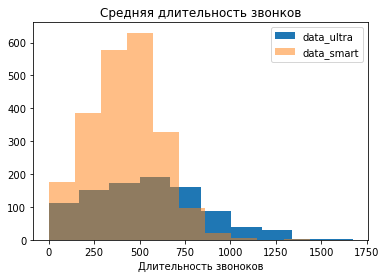

In [45]:
plt.hist(data_ultra['during_call'], bins =10, label='data_ultra')
plt.hist(data_smart['during_call'], bins =10, alpha = 0.5, label='data_smart')
plt.title('Средняя длительность звонков')
plt.xlabel('Длительность звоноков')
plt.legend()
print('Средняя длительность звонков по тарифу ultra:', data_ultra ['during_call'].mean())
print('Средняя длительность звонков по тарифу smart:',data_smart['during_call'].mean())

In [46]:
data_monthly_pay.pivot_table(index = 'tariff_name', values = 'during_call', aggfunc= ['mean', 'var','std'])

,mean,var,std
,during_call,during_call,during_call
tariff_name,,,
smart,419.062978,35844.189551,189.325618
ultra,545.451104,94203.418396,306.925754


Изучая распределения и значения можно сделать выводы:
* данные скошены в положительную сторону
* графики имеют ассиметрию в положительном направлении 
* средняя длительность звонков по тарифу ультра выше
* интервал попадание значений по звонкам тарифа ultra шире, значит больше вариаций длительности звонков по данному тарифу
* по тарифу smart наблюдаются выбросы не попадающие в интервал по правилу трех сигм.

Средний интернет трафик по тарифу ultra: 19.694358974358973
Средний интернет трафик по тарифу smart: 16.33617594254937


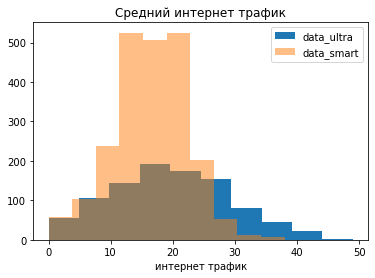

In [47]:
plt.hist(data_ultra['gb_used'], bins =10, label='data_ultra')
plt.hist(data_smart['gb_used'], bins =10, alpha = 0.5, label='data_smart')
plt.title('Средний интернет трафик')
plt.xlabel('интернет трафик')
plt.legend()
print('Средний интернет трафик по тарифу ultra:', data_ultra ['gb_used'].mean())
print('Средний интернет трафик по тарифу smart:',data_smart['gb_used'].mean())


In [48]:
data_monthly_pay.pivot_table(index = 'tariff_name', values = 'gb_used', aggfunc= ['mean', 'var','std'])

,mean,var,std
,gb_used,gb_used,gb_used
tariff_name,,,
smart,16.336176,32.923756,5.737923
ultra,19.694359,94.146734,9.702924


Изучая распределения и значения можно сделать выводы:

* данные по тарифу ultra скошены в положительную сторону
* данные по тарифу smart близки к нормальному распределению
* средние значения используемого интернет трафик примерно равны
* интервал попадание значений по интернет трафику по тарифу ultra шире, значит больше вариаций использования трафика по данному тарифу.

Среднее колличество отправленных сообщений по тарифу ultra: 61.161006289308176
Среднее колличество отправленных сообщений по тарифу smart: 38.71644120707596


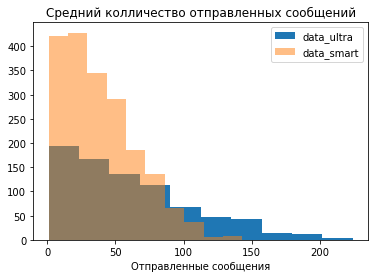

In [49]:
plt.hist(data_ultra['message_count'], bins =10, label='data_ultra')
plt.hist(data_smart['message_count'], bins =10, alpha = 0.5, label='data_smart')
plt.title('Средний колличество отправленных сообщений')
plt.xlabel('Отправленные сообщения')
plt.legend()
print('Среднее колличество отправленных сообщений по тарифу ultra:', data_ultra ['message_count'].mean())
print('Среднее колличество отправленных сообщений по тарифу smart:',data_smart['message_count'].mean())


In [50]:
data_monthly_pay.pivot_table(index = 'tariff_name', values = 'message_count', aggfunc= ['mean', 'var','std'])

,mean,var,std
,message_count,message_count,message_count
tariff_name,,,
smart,38.716441,717.594201,26.787949
ultra,61.161006,2109.659183,45.931026


Изучая распределения и значения можно сделать выводы:

* данные по тарифам сильно скошены в положительную сторону
* среднее занчение по отправленным сообщениям по тарифу ultra больше
* интервал попадание значений по количетсву отправленных сообщений по тарифу ultra шире, значит больше вариаций использования сообщений по данному тарифу.

Средняя выручка по тарифу ultra: 2070.1522842639592
Средняя выручка по тарифу smart: 1289.9735307312696


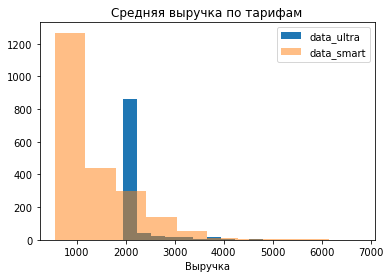

In [51]:
plt.hist(data_ultra['monthly_pay'], bins =10, label='data_ultra')
plt.hist(data_smart['monthly_pay'], bins =10, alpha = 0.5, label='data_smart')
plt.title('Средняя выручка по тарифам')
plt.xlabel('Выручка')
plt.legend()
print('Средняя выручка по тарифу ultra:', data_ultra ['monthly_pay'].mean())
print('Средняя выручка по тарифу smart:',data_smart['monthly_pay'].mean())

In [52]:
data_monthly_pay.pivot_table(index = 'tariff_name', values = 'monthly_pay', aggfunc= ['mean', 'var','std'])

,mean,var,std
,monthly_pay,monthly_pay,monthly_pay
tariff_name,,,
smart,1289.973531,669785.708006,818.404367
ultra,2070.152284,141516.745079,376.187114


Изучая распределения и значения можно сделать выводы:

* данные по тарифам сильно скошены в положительную сторону
* средняя выручка по тарифу ultra больше
* пользователи тарифа smart чаще всего выходят за пределы лимитной платы по своему тарифу
* интервал попадание значений по количетсву отправленных сообщений по тарифу ultra шире, значит больше вариаций использования сообщений по данному тарифу.

# 3. Проверка гипотез

Для проверки первой гипотезы "средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" сравним средние двух генеральных совокупностей. 

Нулевую гипотезу зададим как: Средняя выручка тарифов «Ультра» и «Смарт» равна.

Альтернативная гипотеза: Средня выручка тарифов тарифов «Ультра» и «Смарт» не равна.

Пороговое значение alpha = .05



In [53]:
from scipy import stats as st 
alpha = .05 

results_pay = st.ttest_ind(
data_ultra['monthly_pay'], data_smart['monthly_pay'], equal_var=False) 

print('p-значение:', results_pay.pvalue)

if results_pay.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Вывод**

Отвергаем нулевую гипотезу, следовательно средняя выручка у тарифов разная. Полученное значение p-value говорит о том, что вероятность получить равную среднуюю выручку почти нулевая.

In [54]:
data_users = data.merge(dus, on='user_id', how='left') ## Объединим таблицы для формирования данных о городах пользователей оператором Мегалайн
display(data_users)

,month_x,user_id,message_count,call_count,during_call,gb_used,tariff_name,messages_included,mb_per_month_included,minutes_included,...,rub_per_minute,monthly_pay,age,churn_date,city,first_name,last_name,reg_date,tariff,month_y
0,5.0,1000,22.0,22.0,159.0,3.0,ultra,1000,30.0,3000,...,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,6.0,1000,60.0,43.0,172.0,23.0,ultra,1000,30.0,3000,...,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
2,7.0,1000,75.0,47.0,340.0,14.0,ultra,1000,30.0,3000,...,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
3,8.0,1000,81.0,52.0,408.0,14.0,ultra,1000,30.0,3000,...,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
4,9.0,1000,57.0,58.0,466.0,15.0,ultra,1000,30.0,3000,...,1,1950.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,10.0,1494,NaN,52.0,354.0,18.0,smart,50,15.0,500,...,3,1150.0,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,8
3212,11.0,1494,NaN,63.0,411.0,18.0,smart,50,15.0,500,...,3,1150.0,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,8
3213,12.0,1494,NaN,62.0,418.0,18.0,smart,50,15.0,500,...,3,1150.0,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,8
3214,NaN,1128,NaN,NaN,NaN,NaN,ultra,1000,30.0,3000,...,1,1950.0,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,12


In [55]:
data_city_pay = data_users.pivot_table(index=('user_id', 'city', 'month_x', 'tariff_name',), values=('message_count', 'call_count', 'during_call', 'gb_used', 'monthly_pay'))
display(data_city_pay)

call_count  during_call  gb_used  \
user_id city        month_x tariff_name                                     
1000    Краснодар   5.0     ultra              22.0        159.0      3.0   
                    6.0     ultra              43.0        172.0     23.0   
                    7.0     ultra              47.0        340.0     14.0   
                    8.0     ultra              52.0        408.0     14.0   
                    9.0     ultra              58.0        466.0     15.0   
...                                             ...          ...      ...   
1498    Владикавказ 10.0    smart              41.0        247.0     21.0   
1499    Пермь       9.0     smart               9.0         70.0      2.0   
                    10.0    smart              68.0        449.0     18.0   
                    11.0    smart              74.0        612.0     18.0   
                    12.0    smart              69.0        492.0     13.0   

                                         message_count  monthly_pay  
user_id city        month_x tariff_name                              
1000    Краснодар   5.0     ultra                 22.0       1950.0  
                    6.0     ultra                 60.0       1950.0  
                    7.0     ultra                 75.0       1950.0  
                    8.0     ultra                 81.0       1950.0  
                    9.0     ultra                 57.0       1950.0  
...                                                ...          ...  
1498    Владикавказ 10.0    smart                 42.0       1750.0  
1499    Пермь       9.0     smart                 11.0        550.0  
                    10.0    smart                 48.0       1150.0  
                    11.0    smart                 59.0       1513.0  
                    12.0    smart                 66.0        598.0  

[3214 rows x 5 columns]

In [56]:
data_msc = data_city_pay.query('city == "Москва"') #Сводная таблица с данными пользователей из Москвы
display(data_msc.head(10))

call_count  during_call  gb_used  \
user_id city   month_x tariff_name                                     
1001    Москва 11.0    smart              59.0        430.0     18.0   
               12.0    smart              63.0        414.0     14.0   
1003    Москва 8.0     ultra              55.0        380.0      9.0   
               9.0     ultra             134.0        961.0     13.0   
               10.0    ultra             108.0        855.0     15.0   
               11.0    ultra             115.0        824.0     12.0   
               12.0    ultra             108.0        802.0     10.0   
1007    Москва 4.0     smart              25.0        198.0      8.0   
               5.0     smart              67.0        480.0     18.0   
               6.0     smart              68.0        545.0     14.0   

                                    message_count  monthly_pay  
user_id city   month_x tariff_name                              
1001    Москва 11.0    smart                  NaN       1150.0  
               12.0    smart                  NaN        550.0  
1003    Москва 8.0     ultra                 37.0       1950.0  
               9.0     ultra                 91.0       1950.0  
               10.0    ultra                 83.0       1950.0  
               11.0    ultra                 94.0       1950.0  
               12.0    ultra                 75.0       1950.0  
1007    Москва 4.0     smart                 11.0        550.0  
               5.0     smart                 39.0       1150.0  
               6.0     smart                 26.0        685.0

In [57]:
data_city = data_city_pay.query('city != "Москва"') #Сводная таблица с данными пользователей не из Москвы
display(data_city.head(10))

call_count  during_call  gb_used  \
user_id city        month_x tariff_name                                     
1000    Краснодар   5.0     ultra              22.0        159.0      3.0   
                    6.0     ultra              43.0        172.0     23.0   
                    7.0     ultra              47.0        340.0     14.0   
                    8.0     ultra              52.0        408.0     14.0   
                    9.0     ultra              58.0        466.0     15.0   
                    10.0    ultra              57.0        350.0     15.0   
                    11.0    ultra              43.0        338.0     15.0   
                    12.0    ultra              46.0        333.0     10.0   
1002    Стерлитамак 6.0     smart              15.0        117.0     11.0   
                    7.0     smart              26.0        214.0     18.0   

                                         message_count  monthly_pay  
user_id city        month_x tariff_name                              
1000    Краснодар   5.0     ultra                 22.0       1950.0  
                    6.0     ultra                 60.0       1950.0  
                    7.0     ultra                 75.0       1950.0  
                    8.0     ultra                 81.0       1950.0  
                    9.0     ultra                 57.0       1950.0  
                    10.0    ultra                 73.0       1950.0  
                    11.0    ultra                 58.0       1950.0  
                    12.0    ultra                 70.0       1950.0  
1002    Стерлитамак 6.0     smart                  4.0        550.0  
                    7.0     smart                 11.0       1150.0

Для проверки первой гипотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" сравним средние двух генеральных совокупностей.

Нулевую гипотезу зададим как: Средняя выручка пользователей из Москвы равна выручки пользователей из других регионов.

Альтернативная гипотеза: Средня выручка пользователей из Москвы не равна выручки пользователей из других регионов.

Пороговое значение alpha = .05

In [58]:
alpha = .05 

results_city = st.ttest_ind(
data_msc['monthly_pay'], data_city['monthly_pay']) # ваш код: проверьте гипотезу о равенстве средних двух независимых совокупностей

print('p-значение:', results_city.pvalue)

if results_city.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Отвергать нулевую гипотезу нельзя, следовательно средняя выручка у пользователей из Москвы и других городов может быть равна. Полученное значение p-value говорит о том, чтоэ то явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.

# 4. Выводы

1. Поьзователи тарифа Smart в среднем превышают норму по включенному тариф интернет трафику и количеству сообщений, что делает для них этот тариф дороже. 
2. При этом пользователи тарифа Smart укладываются в норму включенную в тариф Ultra для оценки выгодности для пользователей тарифа необходимо провести дополнительное исследование. 
3. Пользователи траифа Ultra в среднем укладыаются в нормы включенные в тарифный план. 
4. Средняя выручка пользователей тарифов Smart и Ultra не равны, что деает тариф ultra более дорогим
5. Средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из жругих городов.
6. Тарифом smart пользуются большее количество людей, при этом выходя за рамки установленные тарифом.
7. **Следует направить рекламный бюджет на тариф ultra т.к. он приносит в среднем большую выручку и в среднем клиенты не выходят за установленные тарифом нормы**